# Kaggle Competition  - Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants (4750 images in total) belonging to 12 species at several growth stages.

# What has been done until now?

- We resized both the train and test image to 128 pixels
- We splitted the train images into 80% training set and 20% validation to detect overfitting

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from glob import glob
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
enc = OneHotEncoder(handle_unknown='ignore')
base_dir = '../../data/train/'

# How balance is the training data?
As already mentioned before, there are 12 classes and a total of 3800 images. However, as seen from the above, the distribution is not even and the class distribution varies from maximum of ~500 images to a minimum of ~190 images. This clearly demonstrates the data is imbalanced and the data need to be balanced in order to get the best results.

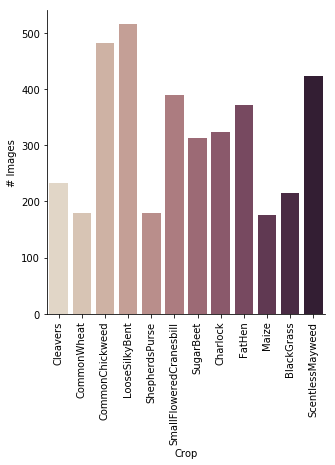

In [76]:
crop_names = [path.split('/')[-1] for path in glob(base_dir+'/*')]
df = pd.DataFrame(crop_names, columns=['Crop'])
info = []
for idx, row in df.iterrows():
    info.append(pd.DataFrame([[row.Crop, path] for path in glob(base_dir+'/'+row.Crop+'/*')]))
data = pd.concat(info)
data.columns = ['Crop', 'Unique Path Image']

# Assign a class number to each crop using the LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(data.Crop.unique())
data['Class'] = data.Crop.apply(lambda x: label_encoder.transform([x])[0])
data = data.reset_index(drop=True).reset_index()
# Plot Distribution Data By Crop
sns.catplot(x="Crop", kind="count", palette="ch:.25", data=data);
plt.xticks(rotation=90)
_ = plt.ylabel('# Images')

# No data, no machine learning!#NoPainNoGain!
Once we have the basic benchmarks ready, it is time to improve over it. We can start with augmenting more data to increase the number of the images in the dataset.
But first the dataset is not balanced, and it needs to be balanced so that even number of images are used in every batch as training data for the models. By oversampling only on the training data, none of the information in the validation data is being used to create synthetic observations. So these results should be generalizable.

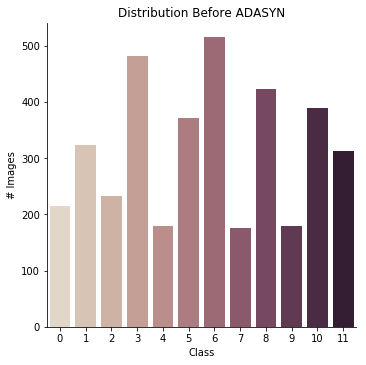

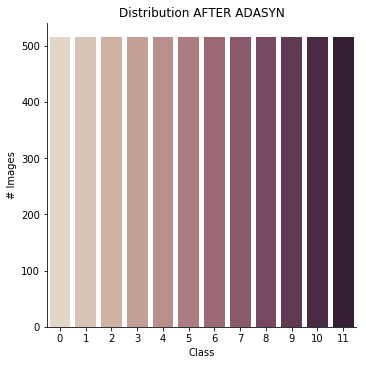

In [78]:
Xtrain = np.array(data[['index']])
ytrain = data['Class'].ravel()

# Plot Distribution Data By Crop
sns.catplot(x="Class", kind="count", palette="ch:.25", data=data);
_ = plt.ylabel('# Images')
plt.title('Distribution Before SMOTE')

from imblearn.over_sampling import SMOTE, ADASYN
# ada = ADASYN(random_state=42)
# XtrainResampled, ytrainResampled = ada.fit_sample(Xtrain, ytrain)

sm = SMOTE(random_state=12)
XtrainResampled, ytrainResampled = sm.fit_sample(Xtrain, ytrain)

# Plot Distribution Data By Crop
sns.catplot(x="Class", kind="count", palette="ch:.25", data=pd.DataFrame(ytrainResampled, columns=['Class']));
_ = plt.ylabel('# Images')
_ = plt.title('Distribution AFTER SMOTE')

In [82]:
smote_data = []
for index in XtrainResampled[:,0]:
    smote_data.append(data[data.index==index])
smote_data = pd.concat(smote_data)
smote_data.to_csv('smote_training_data.csv')